Polynomials

In [ ]:
from numpy.polynomial import Polynomial

In [ ]:
import numpy as np
Polynomial=np.polynomial.Polynomial
#make a polynomial and save it to a variable
p=Polynomial([6,-5,1])
print(p)

poly([ 6. -5.  1.])


In [ ]:
#what are the coefficients of the polynomial?
print(p.coef)

[ 6. -5.  1.]


In [ ]:
#give a value to x and it returns the value of the polynomial for that value
print(p(4))

2.0


In [ ]:
#make an array of some numbers and pass it to the polynomial so the polynomial can return values for those values
a=np.linspace(0,4,5)
print(p(a))

[6. 2. 0. 0. 2.]


In [ ]:
#polynomial algebra (addition,subtraction,multiplication,square,mod etc)
p=Polynomial([6,-5,1])
q=Polynomial([2,-3])
print(p+q)
print(p*q)

poly([ 8. -8.  1.])
poly([ 12. -28.  17.  -3.])


In [ ]:
print(p//q)
print(p%q)
#but using divmod() function is easier cause it returns both value after division and remainder in a tuple
print(divmod(p,q))
quotient,remainder=divmod(p,q)
print(quotient,'\n',remainder)

poly([ 1.44444444 -0.33333333])
poly([3.11111111])
(Polynomial([ 1.44444444, -0.33333333], domain=[-1.,  1.], window=[-1.,  1.]), Polynomial([3.11111111], domain=[-1.,  1.], window=[-1.,  1.]))
poly([ 1.44444444 -0.33333333]) 
 poly([3.11111111])


In [ ]:
print(q**2)

poly([  4. -12.   9.])


In [ ]:
#addition,multiplication,division and many other operations can be done with the scalars
print(p/2)
print(p*2)
print(p+3)

poly([ 3.  -2.5  0.5])
poly([ 12. -10.   2.])
poly([ 9. -5.  1.])


In [ ]:
print(p(q))

poly([0. 3. 9.])


Root finding

In [ ]:
#how to find roots of a polynomial
print(q.roots())
print(p.roots())

[0.66666667]
[2. 3.]


In [ ]:
print(Polynomial([5,4,1]).roots())

[-2.-1.j -2.+1.j]


In [ ]:
#how to make a polynomial from roots
print(Polynomial.fromroots([2,-1,9]))

poly([ 18.   7. -10.   1.])


Calculus

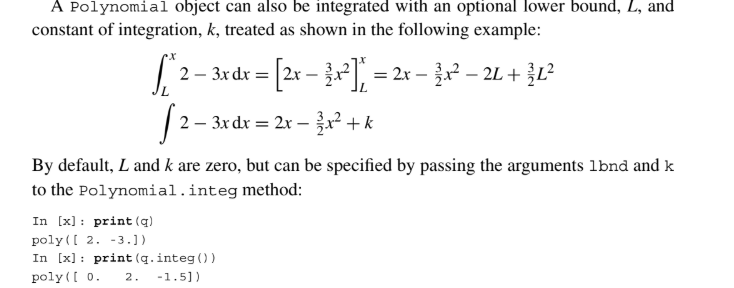

In [ ]:
p=Polynomial([6,-5,1])
print(p)
print(p.deriv())
#p is still unchanged
print(p)
#m is number of derivation
print(p.deriv(m=2))

poly([ 6. -5.  1.])
poly([-5.  2.])
poly([ 6. -5.  1.])
poly([2.])


In [ ]:
q=Polynomial([2,-3])
print(q)
print(q.integ())
#lbnd is the lower bound and k is constant of integration 
print(q.integ(m=1,lbnd=1))
print(q.integ(m=1,k=2))
print(q.integ(m=1,k=2,lbnd=1))

poly([ 2. -3.])
poly([ 0.   2.  -1.5])
poly([-0.5  2.  -1.5])
poly([ 2.   2.  -1.5])
poly([ 1.5  2.  -1.5])


Classical orthogonal polynomials (Legendre's polynomial)

In [ ]:
import numpy as np
Legendre=np.polynomial.Legendre
#convert a polynomial to a Legendre series
A=Legendre([9,4,8])
print(A)

leg([9. 4. 8.])


In [ ]:
#or if there is a polynomial
poly=np.polynomial.Polynomial
p=poly([9,4,8])
A=Legendre.cast(p)
print(A)

leg([11.66666667  4.          5.33333333])


In [ ]:
#an instance of a single Legendre polynomial basis function can be created with the basis() 
L3=Legendre.basis(3)
print(L3)

leg([0. 0. 0. 1.])


In [ ]:
#to obtain a regular power series cast it back to a polynomial 
print(Polynomial.cast(L3))

poly([ 0.  -1.5  0.   2.5])


In [ ]:
A=Legendre([9,4,8])
print(A)
p=A.convert(kind=poly)
print(p)

leg([9. 4. 8.])
poly([ 5.  4. 12.])


In [ ]:
print(A(-2)==p(-2))

True


In [ ]:
print(A.roots())
print(p.roots())

[-0.16666667-0.62360956j -0.16666667+0.62360956j]
[-0.16666667-0.62360956j -0.16666667+0.62360956j]


Fitting polynomials

Polynomial.fit()

In [ ]:
#suppose given a function f(x)=e^-sin40x
x=np.linspace(100,100.1,1001)
print(x)
f=lambda x: np.exp(-np.sin(40*x))
p=Polynomial.fit(x,f(x),4)
print(p)

[100.     100.0001 100.0002 ... 100.0998 100.0999 100.1   ]
poly([ 1.49422551 -2.54641449  0.63284641  1.84246463 -1.02821956])


In [ ]:
print(p.domain)
print(p.window)

[100.  100.1]
[-1.  1.]


In [ ]:
a,b=p.mapparms()
print(a,b)
print(p(a+b*100.05))
print(p(100.05))

-2001.0000000001137 20.000000000001137
-16499200008305.766
1.4942255113759981


[100.    100.025 100.05  100.075 100.1  ] [1.80280222 2.63107256 1.49422551 0.54527422 0.39490249]


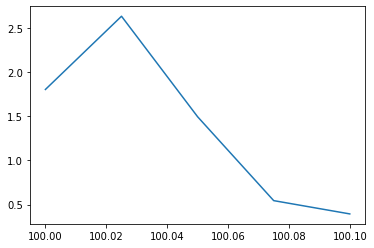

In [ ]:
x,y=p.linspace(5)
print(x,y)
import pylab as plt
ax=x
ay=y
plt.plot(ax,ay)
plt.show()

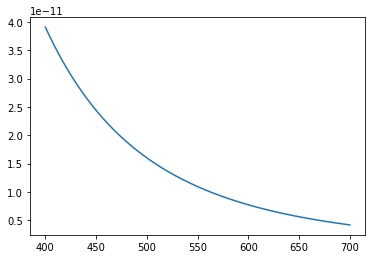

poly([ 1.07041864e-11 -1.16488662e-11  1.02545751e-11 -5.64068914e-12])


In [ ]:
x=np.linspace(400,700,1000)
y=1/x**4
ax=x
ay=y
plt.plot(ax,ay)
plt.show()
p=Polynomial.fit(x,y,3)
print(p)

In [ ]:
deg=3
p,[resid,rank,sing_val,rcond]=Polynomial.fit(x,y,deg,full=True)
print(p)
print(resid)
print(rank)
print(sing_val)
print(rcond)

poly([ 1.07041864e-11 -1.16488662e-11  1.02545751e-11 -5.64068914e-12])
[4.57180972e-23]
4
[1.3843828  1.32111941 0.50462215 0.28893641]
2.220446049250313e-13


Linear Algebra

In [ ]:
import numpy as np
A=np.array([[1,2,3],[5,0,1],[3,9,4]])
print(A)
#scalar multiplication
print(A*3)
#dot product vs. matrix multiplication does the same thing
a=np.array([[1,2],[3,4]])
b=np.array([[3,1],[2,4]])
print('array dot product')
print(a.dot(b))
print(np.dot(a,b))
a=np.matrix([[1,2],[3,4]])
b=np.matrix([[3,1],[2,4]])
print('matrix normal multiplication')
print(a*b)
#elementwise multiplication
a=np.array([[1,2],[3,4]])
b=np.array([[3,1],[2,4]])
print('elementwise mulplication: array1 * array2')
print(a*b)
#transposing an array
a=np.array([[1,2,3,4,5],[5,6,7,8,9],[10,11,12,13,14]])
print('transposing an array')
print(a.T)
print(a.transpose())
#how to make an identity matrix
print('(5,5) identity matrix')
print(np.eye(5,5))

[[1 2 3]
 [5 0 1]
 [3 9 4]]
[[ 3  6  9]
 [15  0  3]
 [ 9 27 12]]
array dot product
[[ 7  9]
 [17 19]]
[[ 7  9]
 [17 19]]
matrix normal multiplication
[[ 7  9]
 [17 19]]
elementwise mulplication: array1 * array2
[[ 3  2]
 [ 6 16]]
transposing an array
[[ 1  5 10]
 [ 2  6 11]
 [ 3  7 12]
 [ 4  8 13]
 [ 5  9 14]]
[[ 1  5 10]
 [ 2  6 11]
 [ 3  7 12]
 [ 4  8 13]
 [ 5  9 14]]
(5,5) identity matrix
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
#inner and outer product of arrays
#if a and b are columnd vectors (a.T).dot(b) is the inner product of a and b
a=np.array([1,2,3])
b=np.array([3,4,5])
#(a.T).dot(a) and np.inner(a,b) does the same thing
print((a.T).dot(b))
print(np.inner(a,b))
#a.dot(b.T)
print(np.outer(a,b))

26
26
[[ 3  4  5]
 [ 6  8 10]
 [ 9 12 15]]


In [ ]:
#how to raise a matrix to a power
a=np.array([[1,2],[3,5]])
print(np.linalg.matrix_power(a,3))
#and using a.dot(a.dot(a)) can give the same result
print(a.dot(a.dot(a)))
#the ** operator performs elementwise exponentiation
print(a)
print(a**2)
#a specific value in an array can be exponentiate
a[0,1]=a[0,1]**2
print(a)

[[ 43  74]
 [111 191]]
[[ 43  74]
 [111 191]]
[[1 2]
 [3 5]]
[[ 1  4]
 [ 9 25]]
[[1 4]
 [3 5]]


In [ ]:
#find the norm (uses eucledian norm for one dimensional arrays)
a=np.array([1,2,2])
print(np.linalg.norm(a))
#find the norm (uses frobenius norm for multi dimensional arrays)
a=np.array([[1,1,1],
            [1,1,1],
            [1,1,1]])
print(np.linalg.norm(a))
#find out the determinant
print(np.linalg.det(a))
#trace() (sum of an array's diagonal elements)
print(a)
print(np.trace(a))
#the rank of a matrix
print(np.linalg.matrix_rank(a))
#inverse of a matrix 
a=np.array([[3,9],
            [9,3]])
print(np.linalg.inv(a))

3.0
3.0
0.0
[[1 1 1]
 [1 1 1]
 [1 1 1]]
3
1
[[-0.04166667  0.125     ]
 [ 0.125      -0.04166667]]


eigenvalues and eigenvectors 

In [ ]:
import numpy as np 
A=np.array([[0,0.5],[-1,2]])
vals,vecs=np.linalg.eig(A)
print(vals)
print(vecs)
#verify that the sum of eigenvalues is equals sum of diagonal values of A
print(np.isclose(np.sum(vals),np.trace(A)))
#gives only the eigenvalues not the eigenvectors 
print(np.linalg.eigvals(A))
#for hermitian or real symmetric matrices np.linalg.eigh() and np.linalg.eigvalsh() is used        

[0.29289322 1.70710678]
[[-0.86285621 -0.28108464]
 [-0.50544947 -0.95968298]]
True
[0.29289322 1.70710678]


solving equations (linear scalar equations)

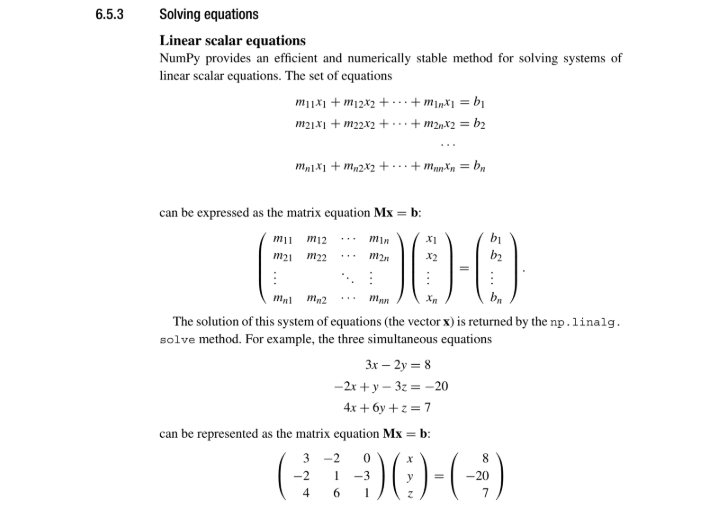

In [ ]:
M=np.array([[3,-2,0],[-2,1,-3],[4,6,1]])
b=np.array([8,-20,7]) 
print(np.linalg.solve(M,b))
#linear least sqaures solutions (best fit) 
print(np.linalg.lstsq(M,b))
a,b,c,d=np.linalg.lstsq(M,b)
print(a) #solution array 
print(b) #sum of squared residuals 
print(c) #the rank of M 
print(d) #singular values of M 

[ 2. -1.  5.]
(array([ 2., -1.,  5.]), array([], dtype=float64), 3, array([7.32505787, 4.59442839, 2.28795869]))
[ 2. -1.  5.]
[]
3
[7.32505787 4.59442839 2.28795869]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Matrices

In [ ]:
#numpy matrix is a subclass of numpy ndarray class
#a matrix is always a two dimensional array so if you flatten a matrix it will not be an one dimensional matrix rather it will turn into a (1,n) matrix 
import numpy as np
matrix=np.matrix([[1,2,3],
                  [9,3,1]])
flattened_matrix=matrix.flatten()
print(flattened_matrix)
print(flattened_matrix.ndim)

[[1 2 3 9 3 1]]
2


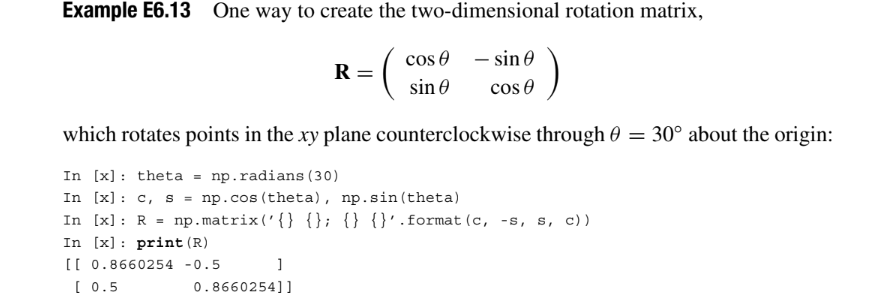

In [ ]:
print(matrix)
print(np.matrix(matrix,copy=False))
print(np.matrix(np.eye(3,3)))
#make a two dimensional rotation matrix
theta=np.radians(30)
cos,sin=np.cos(theta),np.sin(theta)
rotation_matrix=np.matrix([[cos,-sin],[sin,cos]])
print(rotation_matrix)

[[1 2 3]
 [9 3 1]]
[[1 2 3]
 [9 3 1]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


In [ ]:
#numpy ndarrays does elementwise multiplication, to do matrix multiplication use matrices
print(np.array([1,2,3])**2)
print(np.exp(np.array([1,2,3])))
#matrix multiplication matrices must be (1,n) and (n,1) or the number of rows and number of columns have to be the same
print(np.matrix([1,2,3])*np.matrix([[1],[2],[3]]))
#elememtwise multiplication using arrays
print(np.array([1,2,3])*np.array([1,2,3]))
A=np.matrix([[1,2],[3,9]])
#A*A*A
print(A**3)
A=np.array([[1,2],[3,9]])
#A.dot(A.dot(A)) does the same
print(A.dot(A.dot(A)))

[1 4 9]
[ 2.71828183  7.3890561  20.08553692]
[[14]]
[1 4 9]
[[ 67 194]
 [291 843]]
[[ 67 194]
 [291 843]]


In [ ]:
a=np.matrix([[1,2,3,9],
             [4,5,6,3],
             [7,9,8,12]])
#transposing an array using transpose or T attributes
print('transpose of the matrix')
print(a.transpose())
print('using T')
print(a.T)
#diagonal() is used for retrieving diagonal values of a matrix
print('diagonal values of the matrix') 
print(a.diagonal())
#hermitian transpose
print('hermitian transpose')
print(a.H)
#matrix inverse using matrix.I
print('inverse of the matrix')
print(a.I)
#trace() is used for retrieving the summation of the diagonal values
print('summation of the diagonal values of the matrix')
print(np.trace(a))
a=np.matrix([[1,2,3],
             [4,5,6],
             [7,9,8]])
#use np.linalg.det(matrix) to find the determinant of the matrix
print('determinant of the matrix')
print(np.linalg.det(a))
print('eigenvalues and eigenvectores of the matrix') 
eigenvalues,eigenvectors=np.linalg.eig(a)
print(eigenvalues,eigenvectors)

transpose of the matrix
[[ 1  4  7]
 [ 2  5  9]
 [ 3  6  8]
 [ 9  3 12]]
using T
[[ 1  4  7]
 [ 2  5  9]
 [ 3  6  8]
 [ 9  3 12]]
diagonal values of the matrix
[[1 5 8]]
hermitian transpose
[[ 1  4  7]
 [ 2  5  9]
 [ 3  6  8]
 [ 9  3 12]]
inverse of the matrix
[[-0.20084388 -0.15668073  0.18677918]
 [-0.18059072 -0.12967651  0.17074543]
 [ 0.2371308   0.42728551 -0.28495077]
 [ 0.09451477 -0.09620253  0.03628692]]
summation of the diagonal values of the matrix
14
determinant of the matrix
8.999999999999998
eigenvalues and eigenvectores of the matrix
[15.91993995 -0.36313366 -1.55680629] [[-0.23489129 -0.72518129 -0.63304892]
 [-0.53275636  0.67762035 -0.27572337]
 [-0.81301706 -0.12224056  0.72334341]]


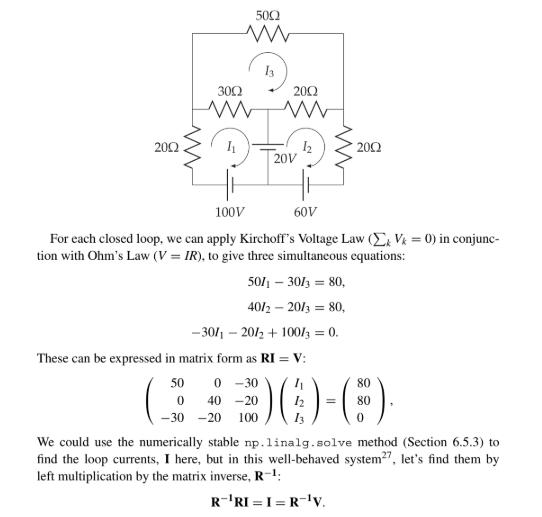

In [ ]:
#make a matrix for R and one for V
R=np.matrix([[50,0,-30],[0,40,-20],[-30,-20,100]])
V=np.matrix([[80],[80],[0]])
R_inv=np.linalg.inv(R)
print(R_inv)
print(R_inv*V)
I1,I2,I3=R_inv*V
print(I1,I2,I3)

[[0.025      0.00416667 0.00833333]
 [0.00416667 0.02847222 0.00694444]
 [0.00833333 0.00694444 0.01388889]]
[[2.33333333]
 [2.61111111]
 [1.22222222]]
[[2.33333333]] [[2.61111111]] [[1.22222222]]


Random Sampling 

In [ ]:
#np.random uses PRNG (pseudorandom number generator) can be reseeded with any hashable object like an immutable object such as an integer
import numpy
print('seed is 42')
np.random.seed(42)
print(np.random.randint(1,10,10))
print(np.random.randint(1,10,10))
print(np.random.randint(1,10,10))
#reseed the PRNG with the same seed used before
np.random.seed(42)
#PRNG will give the same values because it it reseeded by 42 
print('after reseeding the PRNG giving value 42')
print(np.random.randint(1,10,10))
print(np.random.randint(1,10,10))
print(np.random.randint(1,10,10))

seed is 42
[7 4 8 5 7 3 7 8 5 4]
[8 8 3 6 5 2 8 6 2 5]
[1 6 9 1 3 7 4 9 3 5]
after reseeding the PRNG giving value 42
[7 4 8 5 7 3 7 8 5 4]
[8 8 3 6 5 2 8 6 2 5]
[1 6 9 1 3 7 4 9 3 5]


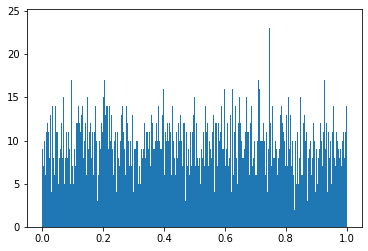

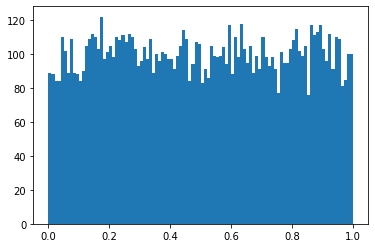

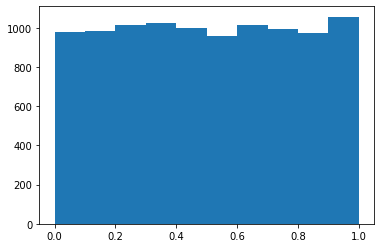

In [ ]:
#let's make a graph of uniform distribution using random samples
import pylab as pyl
pyl.hist(np.random.random_sample(10000),bins=1000)
pyl.show()
pyl.hist(np.random.random_sample(10000),bins=100)
pyl.show()
pyl.hist(np.random.random_sample(10000),bins=10)
pyl.show()

In [ ]:
print(np.random.random_sample((3,2)))

[[0.98063783 0.48938515]
 [0.03115915 0.34776169]
 [0.58046285 0.62517185]]


In [ ]:
#this is a bit weird syntax though
#if you want to make an array giving some random numbers from a range of some numbers as [a,b)
#suppose a=10,b=20
#a+(b-a)*np.random.random_sample((3,2))
a=10+(20-10)*np.random.random_sample((3,2))
print(a)
b=-5+(0+5)*np.random.random_sample((3,2))
print(b)

[[14.50154887 10.09149289]
 [15.44025653 13.9359528 ]
 [14.33370085 11.10223126]]
[[-2.30831081 -4.59867345]
 [-3.15337885 -2.18259713]
 [-4.10698035 -3.80404015]]


In [ ]:
#np.random.rand() can also be used similarly like np.random.random_sample()
a=np.random.rand(3,2)
print(a)
#the range of random numbers can be defined by using the syntax a+(b-a)*np.random.random_sample((rows,columns)) as learned earlier
a=10+(20-10)*np.random.rand(3,2)
print(a)
#make a flat array with random numbers ranging from 10 to 20 
a=10+(20-10)*np.random.rand(10)
print(a)

[[0.35541742 0.85724   ]
 [0.2370648  0.61915474]
 [0.8523403  0.68585057]]
[[19.55302372 15.50070341]
 [12.22113759 10.85881674]
 [19.25802721 14.27374424]]
[11.16587519 16.25409491 10.19170791 17.04283252 16.19906947 14.79374192
 15.67989869 11.35581154 19.57203032 10.5254419 ]


In [ ]:
#random integers
#UPPER BOUND is always EXCLUSIVE as example if you want to make an array consisting the number ranging between 0 to 9, you have to set the upper value to 10 not 9 means (0,10) not (0,9)
print(np.random.randint(0,9))
#if lower bound and upper bound is not defined python assumes that the lower bound is 0 and the upper bound is the given value
print(np.random.randint(9))
#make a flat array consisting 10 number ranging from 0 to 9
print(np.random.randint(0,9,size=10))
#how to make a multidimensional array given a range?
print(np.random.randint(0,12,size=(4,3)))

1
0
[1 7 6 8 7 1 5 7 3 3]
[[ 0  5 10]
 [11 11 10]
 [ 8 10  7]
 [ 9 10  8]]


In [ ]:
#suppose we have an array
a=np.linspace(0,9,10)
print(a)
#how to randomly select 5 numbers from the array?
print(a[np.random.randint(0,len(a),size=5)])

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[7. 9. 8. 1. 8.]


TTHHHHHHTHTTTHTTTHTHTHHHHTHTHTHTTHTTHTHHTTTHTTHHTTTHTTHTHTTHHHTHTHTTHHHTHHTHHTHHHTTHTHHHTTHTTHTHTHTH
there are  51  number of heads
there are  49  number of tails


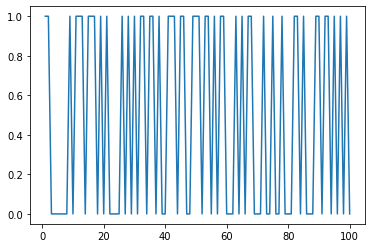

In [ ]:
#a fair coin toss example 
vals=['H','T']
toss_results=''.join(vals[x] for x in np.random.randint(0,2,size=100))
print(toss_results)
count1=0
count2=0
for x in range(100):
  if toss_results[x]=='H':
    count1+=1
  else:
    count2+=1
print('there are ',count1,' number of heads')
print('there are ',count2,' number of tails')
import pylab as pyl
ax=np.linspace(1,100,100)
ay=[]
for x in range(100):
  if toss_results[x]=='H':
    ay.append(0)
  else:
    ay.append(1)
pyl.plot(ax,ay)
pyl.show()

Normal Distribution 

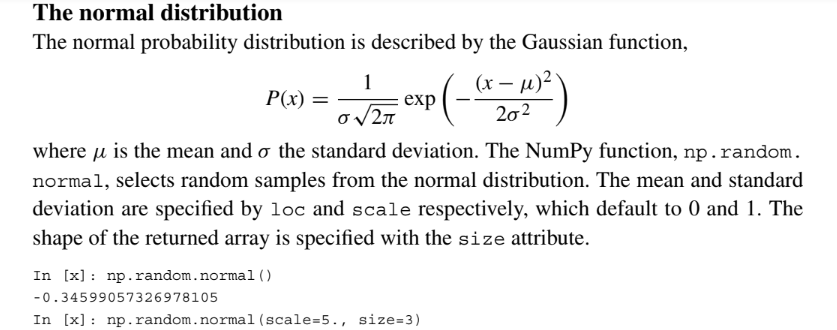

In [ ]:
#loc is mean and scale is SD
print(np.random.normal())
print(np.random.normal(scale=5,size=3))
print(np.random.normal(loc=1,scale=2,size=10))
print(np.random.normal(loc=100,scale=10,size=(5,2)))

-0.4292033531578866
[ 1.23576806 -0.03654453  1.16072998]
[ 0.61187932  2.36755729  4.24895907  0.2699938   2.97219758 -3.58217283
 -1.65247549  0.56586942  1.82566337 -0.29574615]
[[ 97.81473389 110.6541677 ]
 [ 92.27817646 101.73440733]
 [ 92.10771571 108.52998053]
 [108.48770456  98.87335707]
 [119.4961359  101.41161212]]


In [ ]:
#numbers can be drawn from standard normal distribution with mean=0 and SD=1 using np.random.randn(row,column) like np.random.rand(row,column) it takes dimensions of the desired array as argument
print(np.random.randn(2,3))
#mean and SD cannot be set explicitly though there is a way to define these 
mu=100 #mean
sigma=8 #SD
print(mu+sigma*np.random.randn(4,2))

[[ 0.82112163 -1.78692075  0.00786108]
 [ 0.20476929 -0.6086864   1.41238089]]
[[111.14296532 116.53821837]
 [ 97.25775559 103.79342128]
 [ 89.39269225  89.54059035]
 [ 90.87197601 104.57262443]]


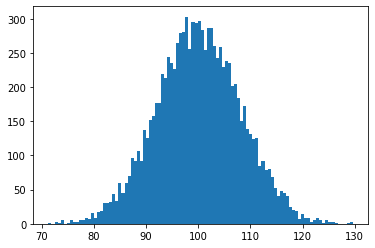

In [ ]:
#let's plot the normal distribution using histogram
import pylab as pyl
mean=100
sd=8
samples=np.random.normal(loc=mean,scale=sd,size=10000)
pyl.hist(samples,bins=100)
pyl.show()

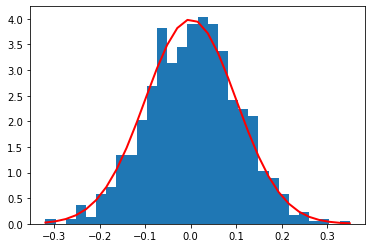

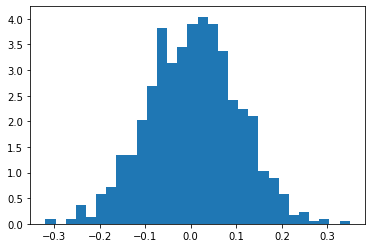

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()
plt.hist(s, 30, density=True)
plt.show()

Binomial Distribution

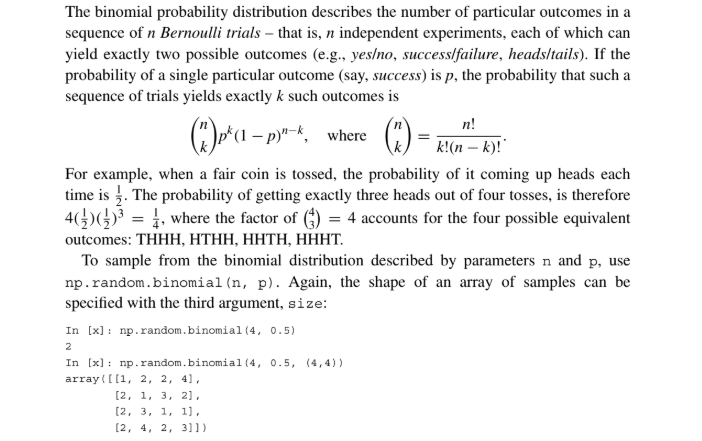

In [ ]:
#probability of head or tail coming up for a fair coin toss is the same 0.5
import numpy as np
#to sample from binomial distribution np.random.binomial(n,p) is used and shape of the random numbers can also be specified as before 
a=np.random.binomial(4,0.5,(5,5))
print(a)

[[0 2 1 1 3]
 [2 4 3 2 3]
 [2 2 1 1 2]
 [1 2 1 1 0]
 [2 1 1 3 2]]


Poisson Distribution

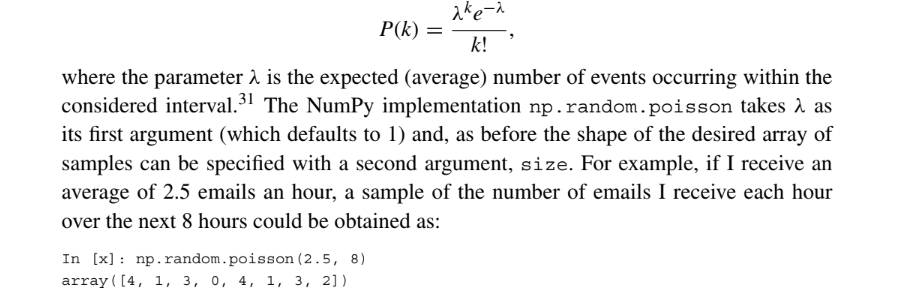

In [ ]:
#suppose i receive 2.5 emails on average per hour
#make a random sample comprises number of emails i receive each hour for the next 8 hours
sample=np.random.poisson(2.5,size=8)
print(sample)

[0 3 5 1 1 2 1 2]


Random Selections, Shuffling and Permutations

In [ ]:
print(np.random.choice([1,3,5,7,9]))
print(np.random.choice(np.arange(10)))
print(np.random.choice(np.arange(10),(5,2)))
#to draw samples without replacement use replace=False
print(np.random.choice(np.arange(9),(3,3),replace=False))
#here in the result no number from 0 to 9 is repeated so that means while 3 is drawn is not replaced so that there is no chance that 3 would be drawn again
print(np.random.choice(np.arange(5),(1,6),p=[0,0.1,0.3,0.1,0.5]))
#probabilites for each element can be specified giving p the probabilies of each element to be drawn
#as example, suppose there is an array of numbers which is [1,2,3,4,5]
#corresponding probabilities for each element is p=[0,0.1,0.3,0.5,0.1]
a=np.array([3,1,5,9,4])
try:
  print(np.random.choice(a,size=(1,5),replace=False,p=[0,0.1,0.3,0,0.6]))
except ValueError:
  print('probabilites for 3 and 9 are 0 so those numbers cannot be drawn thats why error is raised 5 numbers cannot be drawn without replacement while probabilities for two numbers is 0')
#maximum 3 numbers can be drawn beacause 3 of the numbers have probabilities not 0
print(np.random.choice(a,size=(1,3),replace=False,p=[0,0.1,0.3,0,0.6]))
#what about with replacement?
print(np.random.choice(a,size=(1,100),p=[0,0.1,0.3,0,0.6]))
#there is 100 randomly selected numbers in the array most of those numbers are 4 because probability of 4 to be drawm is the maximum among all
#there is 100 randomly selected numbers in the array most of those numbers are 4 because probability of 4 to be drawm is the maximum among all

9
8
[[3 6]
 [8 7]
 [5 6]
 [3 7]
 [1 3]]
[[3 1 0]
 [2 5 4]
 [8 7 6]]
[[1 4 2 1 2 4]]
probabilites for 3 and 9 are 0 so those numbers cannot be drawn thats why error is raised 5 numbers cannot be drawn without replacement while probabilities for two numbers is 0
[[4 5 1]]
[[5 5 5 5 4 4 5 4 5 4 4 1 4 5 4 4 1 4 4 4 4 5 4 5 1 1 4 4 5 4 5 5 4 1 4 4
  4 1 4 1 5 4 4 4 4 4 1 4 5 1 4 4 4 5 4 4 4 5 5 4 4 4 4 5 4 4 4 4 1 4 5 4
  5 4 4 1 4 4 4 4 5 4 5 4 4 4 4 4 5 4 4 1 4 5 4 4 4 5 4 4]]


In [ ]:
#shuffle() rearranges and saves a copy of the rearranged array
#but permutation() rearranges the array and let the original array unchanged
a=np.linspace(0,9,10)
print(a)
np.random.shuffle(a)
print(a)
np.random.permutation(a)
print(a)
#for 2D arrays it behaves a bit weird, rearranges the rows but not the columns
a=np.array([[1,1,1],
            [0,0,0],
            [9,9,9]])
print(a)
np.random.shuffle(a)
print(a)
np.random.permutation(a)
print(a)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 6. 4. 7. 0. 2. 5. 3. 9. 8.]
[1. 6. 4. 7. 0. 2. 5. 3. 9. 8.]
[[1 1 1]
 [0 0 0]
 [9 9 9]]
[[9 9 9]
 [1 1 1]
 [0 0 0]]
[[9 9 9]
 [1 1 1]
 [0 0 0]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


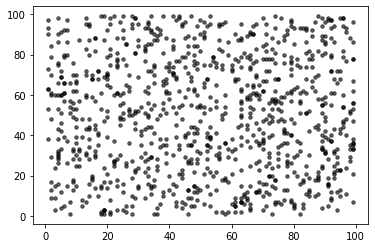

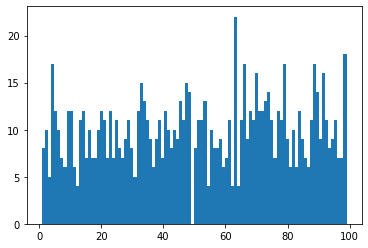

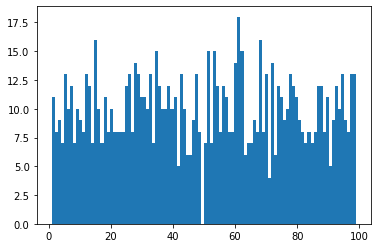

In [ ]:
#plotting an scatter diagram with random values show that random numbers are generated well distributed and follows uniform distribution
import numpy as np
import matplotlib.pyplot as plt
x=np.random.randint(1,100,1000)
y=np.random.randint(1,100,1000)
plt.scatter(x,y,s=12,c=(0,0,0),alpha=0.6)
plt.show()
plt.hist(x,100)
plt.show()
plt.hist(y,100)
plt.show()

Discrete Fourier Transform 

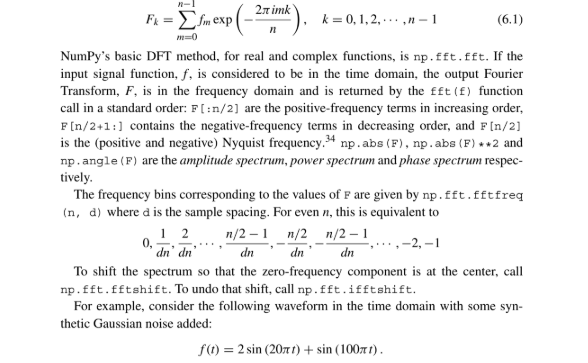

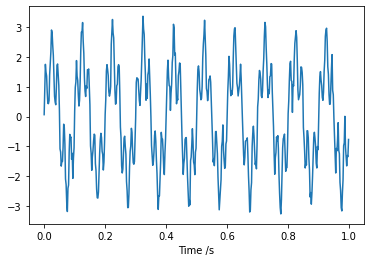

In [ ]:
import random
import pylab
A1,A2=2,1 
f1,f2=10,50 
fsamp=500
t=np.arange(0,1,1/fsamp) 
n=len(t)
f=A1*np.sin(2*np.pi*f1*t)+A2*np.sin(2*np.pi*f2*t)
f+=0.2*np.random.randn(n)
pylab.plot(t,f)
pylab.xlabel('Time /s')
pylab.show()

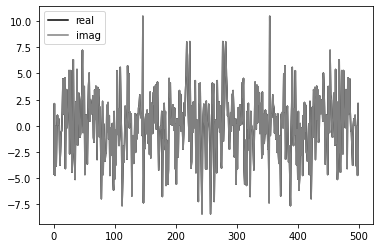

In [ ]:
#the fourier transform of this function is complex 
#its real and imaginary components are plotted 
F=np.fft.fft(f)
pylab.plot(F.real,'k',label='real')
pylab.plot(F.real,'gray',label='imag')
pylab.legend(loc=2)
pylab.show()

500


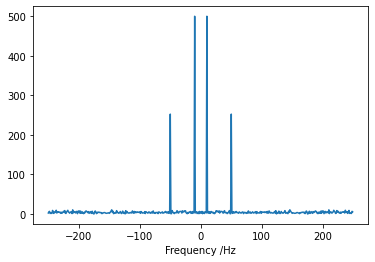

In [ ]:
#shifted amplitude spectrum with the zero frequency component at the centre 
print(n)
f=np.fft.fftfreq(n,1/fsamp)
F_shifted=np.fft.fftshift(F) 
f_shifted=np.fft.fftshift(f) 
pylab.plot(f_shifted,np.abs(F_shifted)) 
pylab.xlabel('Frequency /Hz') 
pylab.show()

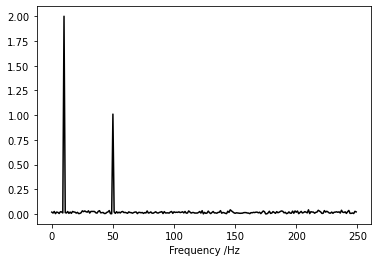

In [ ]:
spec=2/n*np.abs(F[:int(n/2)]) 
pylab.plot(f[:int(n/2)],spec,'k') 
pylab.xlabel('Frequency /Hz') 
pylab.show()